In [198]:
#https://stackoverflow.com/questions/58536436/finding-the-shortest-distance-between-two-points-python

In [199]:
import pandas as pd
import numpy as np


In [200]:
df = pd.read_csv('routes.csv')

In [201]:
df.head()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns
df.head()

,city_a,city_b,distance,color,tunnel,ferry,ferry_count
0,Edinburgh,London,4,B,0,0,NaN
1,Edinburgh,London,4,O,0,0,NaN
2,London,Dieppe,2,X,0,1,1.0
3,London,Dieppe,2,X,0,1,1.0
4,London,Amsterdam,2,X,0,1,2.0


# Preliminary Analysis
### Counting the cities with the most train traffic 
i.e. The most train routes in and out of the city

In [202]:
df[df.city_a == 'Paris']

,city_a,city_b,distance,color,tunnel,ferry,ferry_count
23,Paris,Zürich,3,X,1,0,NaN
24,Paris,Bruxelles,2,Y,0,0,NaN
25,Paris,Bruxelles,2,R,0,0,NaN
26,Paris,Frankfurt,3,W,0,0,NaN
27,Paris,Frankfurt,3,O,0,0,NaN
100,Paris,Pamplona,4,G,0,0,NaN


In [203]:
df[df.city_b == 'Paris']

,city_a,city_b,distance,color,tunnel,ferry,ferry_count
6,Dieppe,Paris,1,P,0,0,NaN
8,Brest,Paris,3,B,0,0,NaN
13,Pamplona,Paris,4,B,0,0,NaN
20,Marseille,Paris,4,X,0,0,NaN


In [204]:
#df.city_a.value_counts()

In [205]:
#QUESTION: The NaNs from this result occur when a city is entirely in one column
    # They have no "value" to count in one of the value_counts() below, resulting in the NaN
        # I've used a diff strategy below to work around, but is there another way to solve? 

#df.city_b.value_counts() + df.city_a.value_counts()


<AxesSubplot:title={'center':'Cities with the most train routes'}>

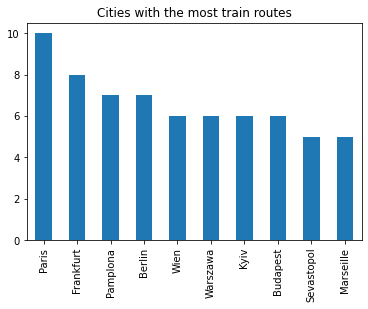

In [206]:
a = df.city_b.value_counts()
b = df.city_a.value_counts()
a.add(b,fill_value=0)

# From the documentation, it seems like the .add function + fill_value=0 helped bc whatever was leading to the NaN's 
    # has now been replaced by a 0 
        # Not sure if that's right though...

total_tracks = a.add(b,fill_value=0)
total_tracks.sort_values(ascending=False).head(10).plot(kind='bar', title='Cities with the most train routes')


In [11]:
df.groupby(by='city_a').distance.count()

city_a
Amsterdam         2
Angora            2
Athína            3
Barcelona         1
Brest             2
Brindisi          2
Bruxelles         2
Bucuresti         3
Constantinople    3
Danzic            1
Dieppe            3
Edinburgh         2
Erzurum           2
Essen             1
Frankfurt         4
Kharkov           3
Kobenhavn         2
Kyiv              4
Lisboa            1
London            3
Madrid            3
Marseille         3
Moskva            2
München           2
Palermo           1
Pamplona          5
Paris             6
Petrograd         2
Riga              1
Roma              2
Rostov            1
Sarajevo          2
Sevastopol        1
Smolensk          1
Smyrna            2
Sochi             2
Stockholm         2
Venezia           2
Warszawa          4
Wien              4
Wilno             3
Zágráb            2
Zürich            2
Name: distance, dtype: int64

In [207]:
# Creating a new dataframe with each city appearing once to store summary statistics about each city 

df_city = a.add(b,fill_value=0).to_frame(name='train_routes_per_city')

df_city.head()

,train_routes_per_city
Amsterdam,4.0
Angora,3.0
Athína,4.0
Barcelona,3.0
Berlin,7.0


In [208]:
df.head()

,city_a,city_b,distance,color,tunnel,ferry,ferry_count
0,Edinburgh,London,4,B,0,0,NaN
1,Edinburgh,London,4,O,0,0,NaN
2,London,Dieppe,2,X,0,1,1.0
3,London,Dieppe,2,X,0,1,1.0
4,London,Amsterdam,2,X,0,1,2.0


<AxesSubplot:title={'center':'Cities with the most adjacent tunnels'}>

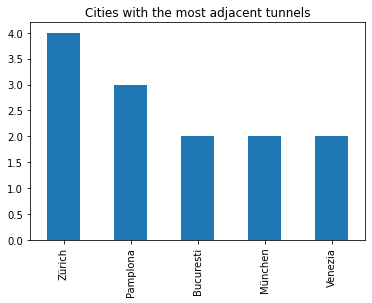

In [209]:
a = df[df.tunnel == 1].city_a.value_counts()
b = df[df.tunnel == 1].city_b.value_counts()


# a = df.city_b.value_counts()
# b = df.city_a.value_counts()
a.add(b,fill_value=0).sort_values(ascending=False).head().plot(kind='bar', title='Cities with the most adjacent tunnels')

# NOTE: What would really be interesting is looking at ratio of tunnel tracks vs total tracks 
# it might be worth making a new df with all of the city names mentioned once with information like this? to track all of the summary stats 

In [210]:
df.tunnel.sum()
#there are 18 routes that require tunnels

18

In [211]:
df_city['tunnel_count'] = a.add(b,fill_value=0)
#df_city

In [212]:
df.head()

,city_a,city_b,distance,color,tunnel,ferry,ferry_count
0,Edinburgh,London,4,B,0,0,NaN
1,Edinburgh,London,4,O,0,0,NaN
2,London,Dieppe,2,X,0,1,1.0
3,London,Dieppe,2,X,0,1,1.0
4,London,Amsterdam,2,X,0,1,2.0


<AxesSubplot:title={'center':'Distribution of number of ferry routes of cities requiring at least one ferry'}>

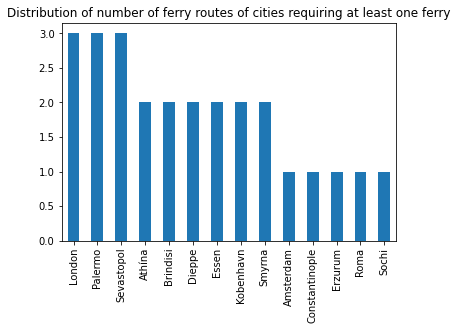

In [213]:
a = df[df.ferry == 1].city_a.value_counts()
b = df[df.ferry == 1].city_b.value_counts()


# a = df.city_b.value_counts()
# b = df.city_a.value_counts()
a.add(b,fill_value=0).sort_values(ascending=False).plot(kind='bar', title='Distribution of number of ferry routes of cities requiring at least one ferry')

# NOTE: same as above for ratio to ferry routes vs total routes for each city 

In [217]:
df_city['ferry_route_count'] = a.add(b,fill_value=0)
df_city.to_csv('Europe_city_info.csv')

In [131]:
df.ferry.sum()
#there are 13 routes that require ferries
df.ferry_count.sum()
# And there are 17 total ferries needed on the board (17 ferries spread over 13 routes)

17.0

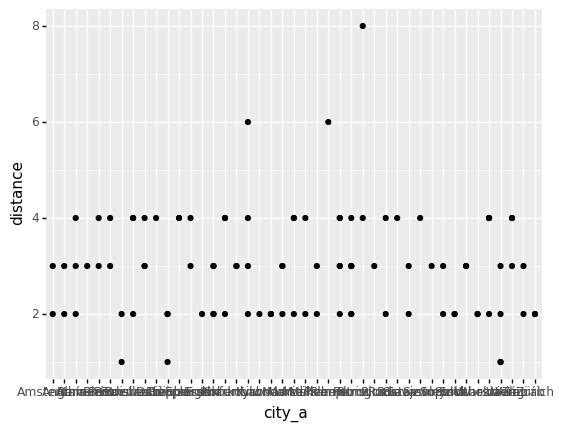

<ggplot: (300176267)>

In [152]:
# This shows the distribution of route lengths (measured in train cars)
from plotnine import ggplot, aes, geom_point, facet_wrap, theme_void

(
    ggplot(df,
          aes('city_a', 'distance'))
        + geom_point()
)

# COME BACK: 
#to get rid of x-axis lables, need to set elemenent blank in theme
# https://stackoverflow.com/questions/35090883/remove-all-of-x-axis-labels-in-ggplot

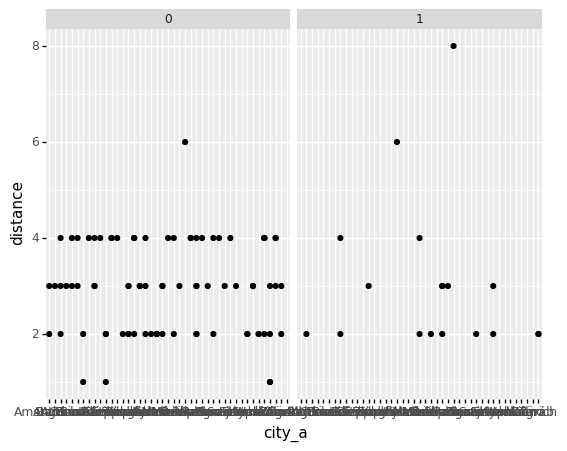

<ggplot: (300222507)>

In [153]:
# This shows the same as above, but separated by "Tunnel" routes and non-tunnel routes 

from plotnine import ggplot, aes, geom_point, facet_wrap

(
    ggplot(df,
          aes('city_a', 'distance'))
        + geom_point()
        + facet_wrap('tunnel')
)

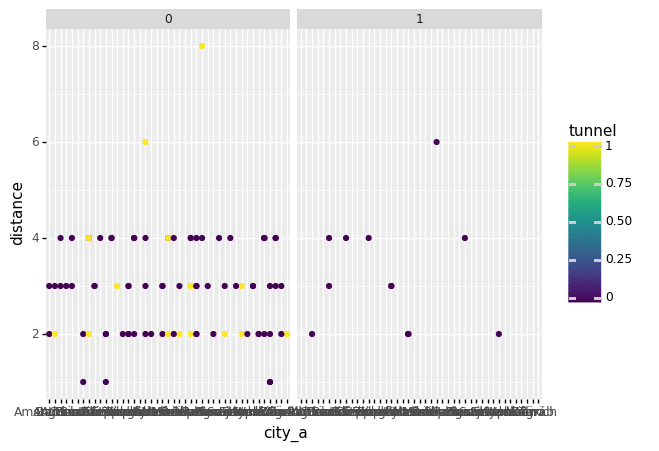

<ggplot: (300572597)>

In [156]:
# This shows the distribution of route lengths, separated by "Ferry" routes and non-ferry routes
    # Ferry routes require a rainbow locamotive in order to build  
        # I've also added a color for the "Tunnel" category; there are no Ferry routes that are also Tunnels
            # This makes sense! Why would you need a boat and an underground train at the same time, afterall? 
        
#COME BACK: is color in the right place?

from plotnine import ggplot, aes, geom_point, facet_wrap

(
    ggplot(df,
          aes('city_a', 'distance', color='tunnel'))
        + geom_point()
        + facet_wrap('ferry')
)

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 88 rows containing missing values.


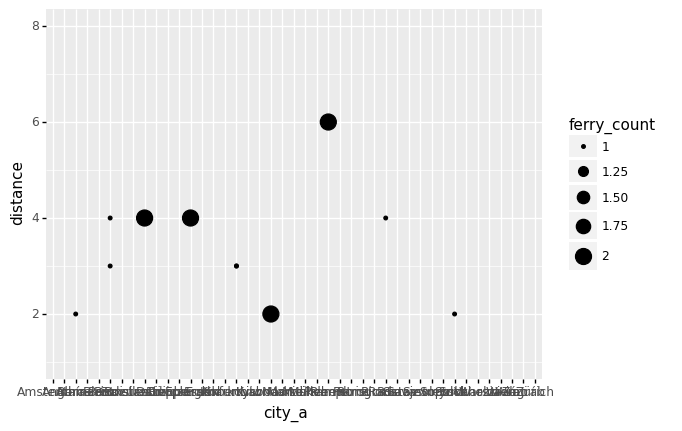

<ggplot: (296557818)>

In [158]:
#COME BACK: make nan = 0 

(
    ggplot(df,
          aes('city_a', 'distance', size='ferry_count'))
        + geom_point()
)